<a href="https://colab.research.google.com/github/josejulianhidayat/Pengolahan_Citra_Digital/blob/main/05_Kontras_dan_Kecerahan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kontras dan Pencerahan: operasi titik**

Operasi titik digunakan untuk meningkatkan kontras dan kecerahan gambar berdasarkan transformasi piksel individual.
Teknik yang digunakan:

✅ Transformasi Logaritmik → Meningkatkan detail pada area gelap

✅ Transformasi Power-Law (Gamma Correction) → Mengatur tingkat kecerahan



# Transformasi Logaritmik

Transformasi logaritmik berguna untuk mencerahkan piksel yang lebih gelap dan meningkatkan detail di area gelap.
Rumus:

s=c⋅log(1+r)

Dimana:

s = nilai piksel output
r = nilai piksel input
c = konstanta skala

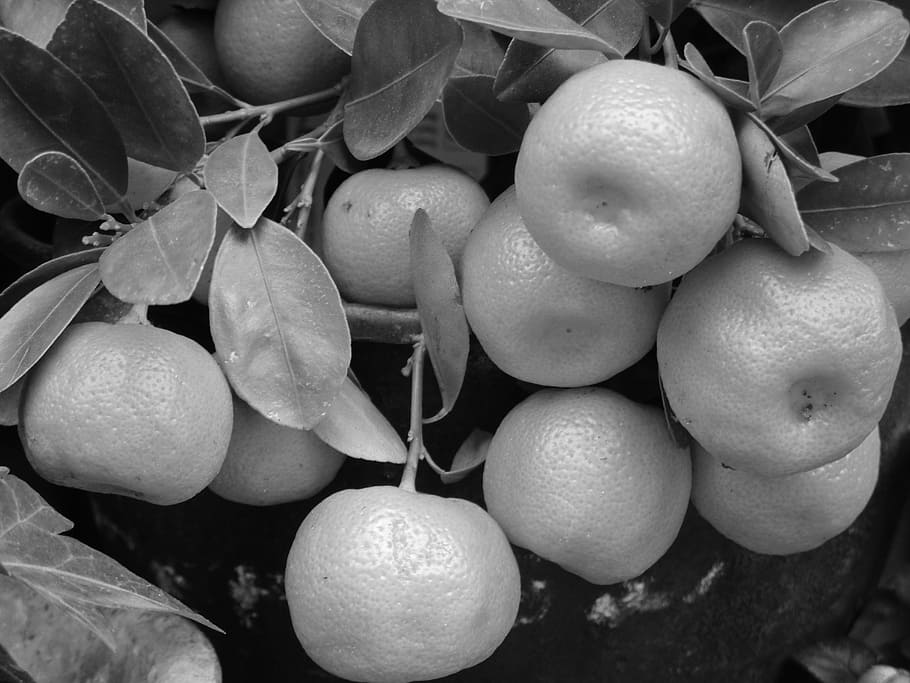

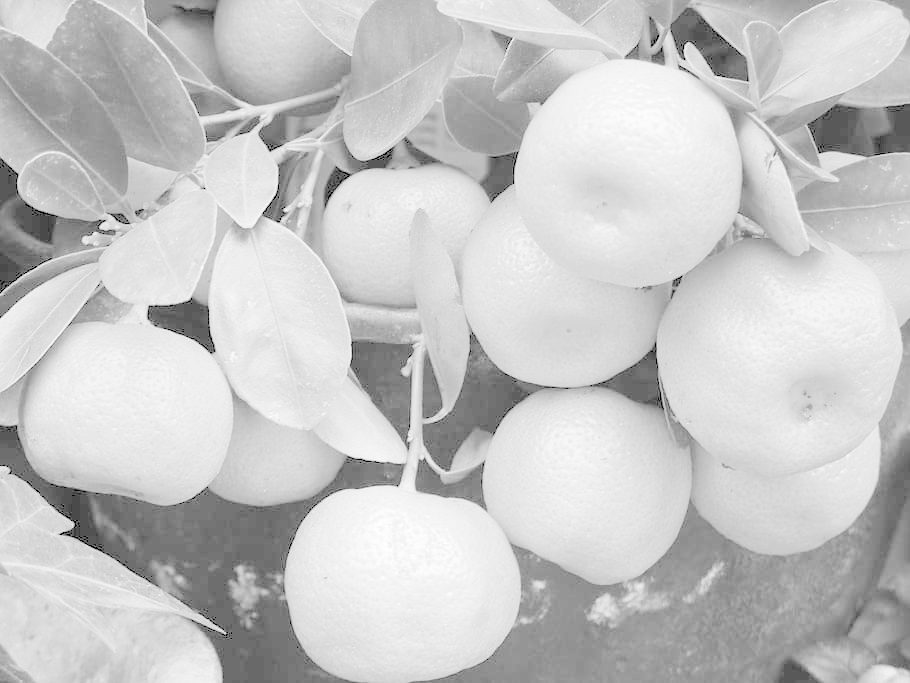

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dalam grayscale
image = cv2.imread('Jeruk_Mandarin.jpg', cv2.IMREAD_GRAYSCALE)

# Transformasi Logaritmik
c = 255 / np.log(1 + np.max(image))  # Konstanta skala
log_transformed = c * np.log(1 + image.astype(np.float32))  # Konversi ke float sebelum log

# Normalisasi hasil ke rentang [0, 255]
log_transformed = np.uint8(log_transformed)

# Menampilkan hasil
cv2_imshow(image)            # Gambar Asli
cv2_imshow(log_transformed)  # Gambar setelah Transformasi Logaritmik


# Transformasi Power-Law (Gamma Correction)

Gamma Correction berguna untuk mencerahkan atau menggelapkan gambar dengan menyesuaikan eksponen gamma.
Rumus:

s=c⋅r^γ

Dimana:

γ (gamma) < 1 → Mencerahkan gambar
γ (gamma) > 1 → Menggelapkan gambar

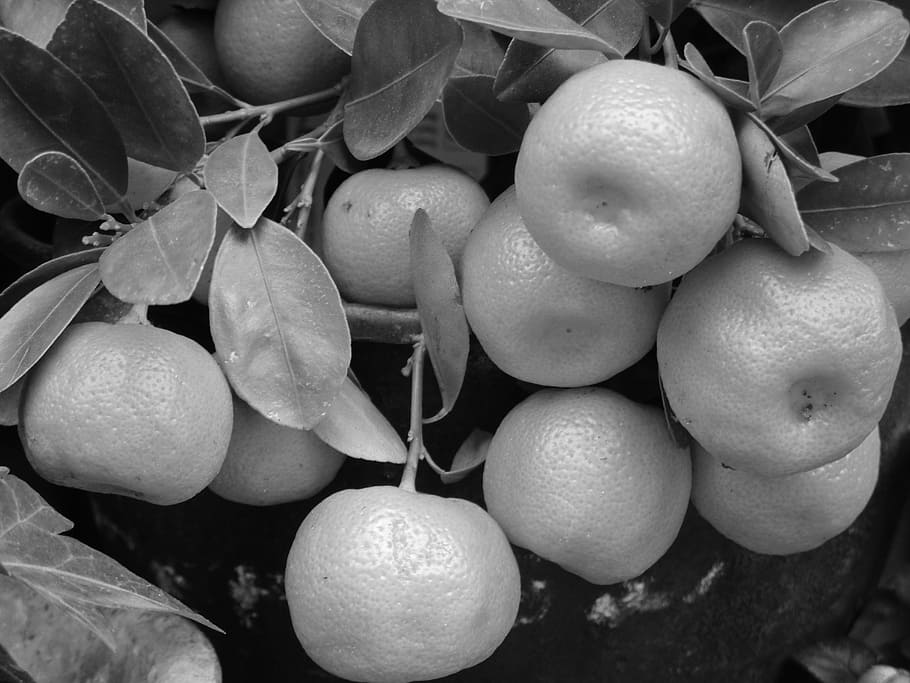

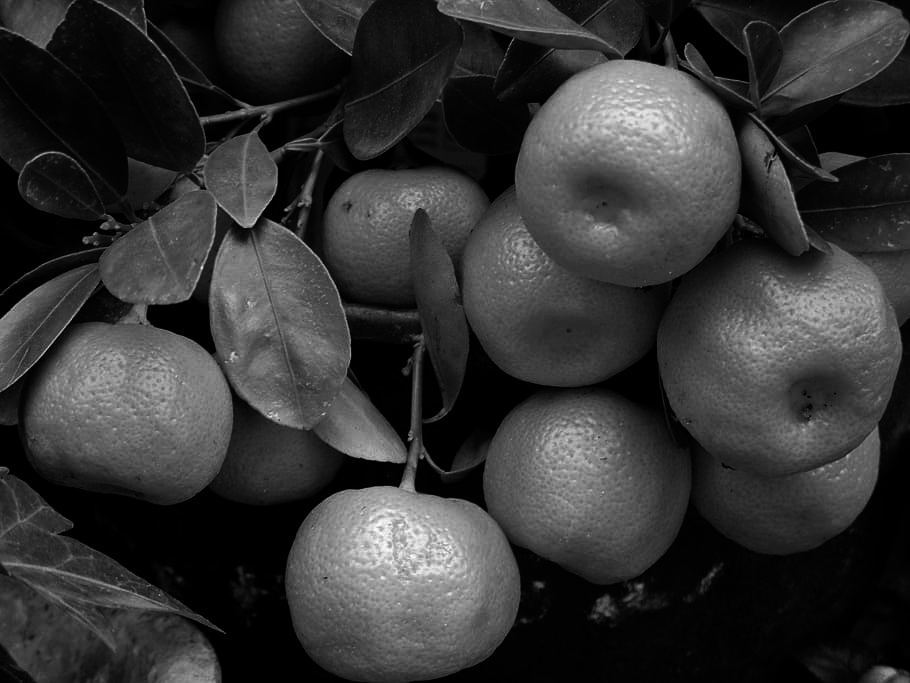

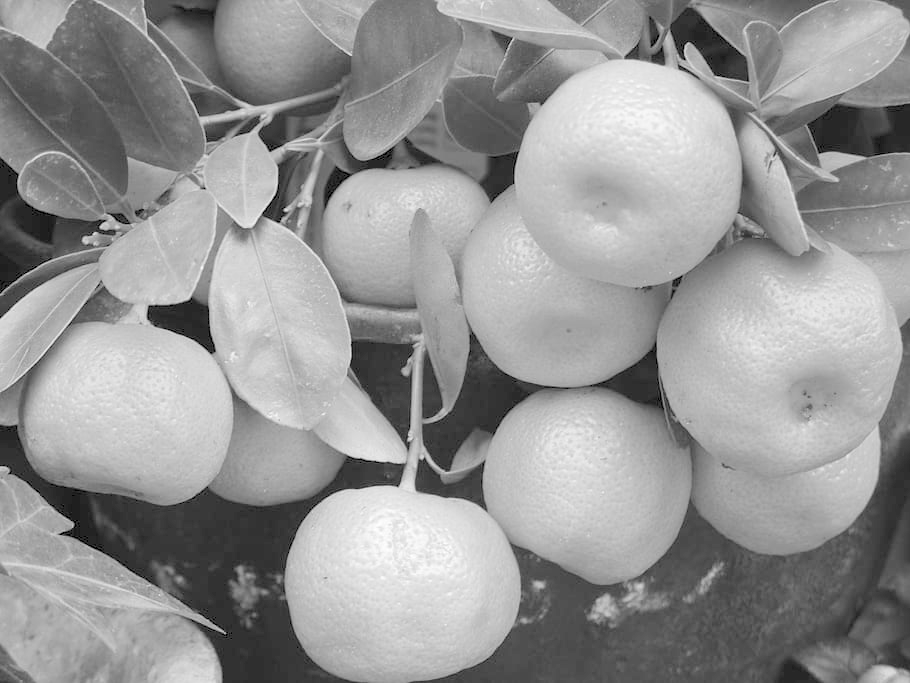

In [3]:
# Fungsi Gamma Correction
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Menerapkan Gamma Correction dengan γ = 0.5 (Mencerahkan)
gamma_bright = gamma_correction(image, gamma=0.5)

# Menerapkan Gamma Correction dengan γ = 2.0 (Menggelapkan)
gamma_dark = gamma_correction(image, gamma=2.0)

# Menampilkan hasil
cv2_imshow(image)        # Gambar Asli
cv2_imshow(gamma_bright) # Gambar lebih terang (γ = 0.5)
cv2_imshow(gamma_dark)   # Gambar lebih gelap (γ = 2.0)
